In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

In [2]:
import spacy

nlp = spacy.load('en_core_web_md')

In [3]:
df = pd.read_csv("sam.csv", dtype=str).fillna('')

In [4]:
df.columns

Index(['Fiscal Year', 'Contracting Office Name', 'Referenced IDV PIID', 'PIID',
       'Modification Number', 'Date Signed', 'Approved Date',
       'Solicitation Date', 'IDV Signed Date',
       'Period of Performance Start Date', 'Legal Business Name',
       'Vendor Address City', 'Vendor Address State',
       'Vendor Address Zip Code', 'Multiyear Contract Code', 'NAICS Code',
       'NAICS Description', 'Product or Service Description',
       'DOD Acquisition Program', 'Extent Competed Description',
       'Funding Agency Name', 'Funding Office Name',
       'Congressional District - Place of Performance',
       'Place of Performance Zip Code',
       'Principal Place of Performance City Name',
       'Principal Place of Performance County Code',
       'Principal Place of Performance State Code',
       'Principal Place of Performance Country Code',
       'Principal Place of Performance Country Name',
       'Is Funded By Foreign Entity (Foreign Funding) Code',
       'Is Fund

In [5]:
columns = ['Legal Business Name', 'NAICS Description', 'Product or Service Description', 'Description of Requirement',]

In [6]:
df = df[columns] # .drop_duplicates().reset_index(drop=True)

In [7]:
naics_description = df.groupby(by = 'Legal Business Name')['NAICS Description'].unique().map(lambda x: "; ".join(x)).to_frame('naics_description')
naics_description.head()

,naics_description
Legal Business Name,
"''MIBURA, INC.''",ELECTRONIC COMPUTER MANUFACTURING
2 TWELVE SOLUTIONS LLC,ENGINEERING SERVICES
22ND CENTURY TECHNOLOGIES INC.,ENGINEERING SERVICES
2G ROBOTICS INC,HARDWARE MANUFACTURING
3DOLOGIE LLC,INSTRUMENTS AND RELATED PRODUCTS MANUFACTURING...


In [8]:
product_service = df.groupby(by = 'Legal Business Name')['Product or Service Description'].unique().map(lambda x: "; ".join(x)).to_frame('product_service')
product_service.head()

,product_service
Legal Business Name,
"''MIBURA, INC.''",IT AND TELECOM - COMPUTE: SERVERS (HARDWARE AN...
2 TWELVE SOLUTIONS LLC,SUPPORT- PROFESSIONAL: ENGINEERING/TECHNICAL
22ND CENTURY TECHNOLOGIES INC.,NATIONAL DEFENSE R&D SERVICES; DEPARTMENT OF D...
2G ROBOTICS INC,"HARDWARE, COMMERCIAL"
3DOLOGIE LLC,"DRAFTING, SURVEYING, AND MAPPING INSTRUMENTS"


In [9]:
requirement_description = df.groupby(by = 'Legal Business Name')['Description of Requirement'].unique().map(lambda x: "; ".join(x)).to_frame("requirement_description")
requirement_description.head()

,requirement_description
Legal Business Name,
"''MIBURA, INC.''","SERVER, R840, POWEREDGE"
2 TWELVE SOLUTIONS LLC,EO14042 SYSTEM ENGINEERING SUPPORT SERVICES; S...
22ND CENTURY TECHNOLOGIES INC.,OBLIGATION OF MINIMUM GUARANTEE; EO14042
2G ROBOTICS INC,INSIGHT PRO (6000M) STANDARD
3DOLOGIE LLC,CREAFORM 3D MEASUREMENT SCANNERS


In [10]:
requirement_description.loc['ZOOM INC.', 'requirement_description']

'P/N GS7296, CLARUS'

In [11]:
businesses = pd.concat([naics_description, product_service, requirement_description], axis=1).reset_index()
businesses.head(20)

,Legal Business Name,naics_description,product_service,requirement_description
0,"''MIBURA, INC.''",ELECTRONIC COMPUTER MANUFACTURING,IT AND TELECOM - COMPUTE: SERVERS (HARDWARE AN...,"SERVER, R840, POWEREDGE"
1,2 TWELVE SOLUTIONS LLC,ENGINEERING SERVICES,SUPPORT- PROFESSIONAL: ENGINEERING/TECHNICAL,EO14042 SYSTEM ENGINEERING SUPPORT SERVICES; S...
2,22ND CENTURY TECHNOLOGIES INC.,ENGINEERING SERVICES,NATIONAL DEFENSE R&D SERVICES; DEPARTMENT OF D...,OBLIGATION OF MINIMUM GUARANTEE; EO14042
3,2G ROBOTICS INC,HARDWARE MANUFACTURING,"HARDWARE, COMMERCIAL",INSIGHT PRO (6000M) STANDARD
4,3DOLOGIE LLC,INSTRUMENTS AND RELATED PRODUCTS MANUFACTURING...,"DRAFTING, SURVEYING, AND MAPPING INSTRUMENTS",CREAFORM 3D MEASUREMENT SCANNERS
5,3YOURMIND INC,SOFTWARE PUBLISHERS,IT AND TELECOM - BUSINESS APPLICATION SOFTWARE...,AGILE ERP SOFTWARE & AGILE MES
6,"3YOURMIND, INC.",SOFTWARE PUBLISHERS,IT AND TELECOM - BUSINESS APPLICATION SOFTWARE...,SOFTWARE LICENSES AND SERVICE.; AGILE SOFTWARE...
7,"4 STAR TECHNOLOGIES, INC.",OTHER COMPUTER RELATED SERVICES; RADIO AND TEL...,IT AND TELECOM - BUSINESS APPLICATION/APPLICAT...,ESSENTIAL SUPPORT FOR SIDEWINDER VIRTUAL; DEOB...
8,"4REEL PRODUCTIONS, LLC",MOTION PICTURE AND VIDEO PRODUCTION,PHOTO/MAP/PRINT/PUBLICATION- ARTS/GRAPHICS,MULTI-MEDIA SERVICES IN ACCORDANCE WITH THE PW...
9,5X SYSTEMS LLC,COMPUTER SYSTEMS DESIGN SERVICES; OTHER COMPUT...,SUPPORT- PROFESSIONAL: ENGINEERING/TECHNICAL; ...,BASE YEAR - ROYAL BAHAMAS DEFENCE FORCE; MODIF...


In [12]:
df['NAICS Description'].value_counts()

NAICS Description
ENGINEERING SERVICES                                                                                                  28906
OTHER COMPUTER RELATED SERVICES                                                                                        5542
COMPUTER SYSTEMS DESIGN SERVICES                                                                                       4194
RADIO AND TELEVISION BROADCASTING AND WIRELESS COMMUNICATIONS EQUIPMENT MANUFACTURING                                  2870
RESEARCH AND DEVELOPMENT IN THE PHYSICAL, ENGINEERING, AND LIFE SCIENCES (EXCEPT NANOTECHNOLOGY AND BIOTECHNOLOGY)     2454
                                                                                                                      ...  
COMMERCIAL AND SERVICE INDUSTRY MACHINERY MANUFACTURING                                                                   2
RESEARCH AND DEVELOPMENT IN THE SOCIAL SCIENCES AND HUMANITIES                                                    

In [13]:
dummy_naics = df.pivot_table(index='Legal Business Name', columns='NAICS Description', values='Description of Requirement', aggfunc='count').fillna(0)
dummy_naics

NAICS Description,ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEMENT CONSULTING SERVICES,AIR AND GAS COMPRESSOR MANUFACTURING,AIR-CONDITIONING AND WARM AIR HEATING EQUIPMENT AND COMMERCIAL AND INDUSTRIAL REFRIGERATION EQUIPMENT MANUFACTURING,AIRCRAFT MANUFACTURING,ALL OTHER BUSINESS SUPPORT SERVICES,ALL OTHER CONSUMER GOODS RENTAL,ALL OTHER INDUSTRIAL MACHINERY MANUFACTURING,ALL OTHER INFORMATION SERVICES,ALL OTHER MISCELLANEOUS ELECTRICAL EQUIPMENT AND COMPONENT MANUFACTURING,ALL OTHER MISCELLANEOUS FABRICATED METAL PRODUCT MANUFACTURING,...,TESTING LABORATORIES AND SERVICES,TRANSLATION AND INTERPRETATION SERVICES,TRUCK TRAILER MANUFACTURING,URETHANE AND OTHER FOAM PRODUCT (EXCEPT POLYSTYRENE) MANUFACTURING,USED HOUSEHOLD AND OFFICE GOODS MOVING,VETERINARY SERVICES,WIRED TELECOMMUNICATIONS CARRIERS,WIRELESS TELECOMMUNICATIONS CARRIERS (EXCEPT SATELLITE),WOOD CONTAINER AND PALLET MANUFACTURING,WOOD OFFICE FURNITURE MANUFACTURING
Legal Business Name,,,,,,,,,,,,,,,,,,,,,
"''MIBURA, INC.''",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 TWELVE SOLUTIONS LLC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22ND CENTURY TECHNOLOGIES INC.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2G ROBOTICS INC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DOLOGIE LLC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEBRA-TECH LIMITED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"ZIVARO, INC.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"ZMICRO, INC.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
dummy_product = df.pivot_table(index='Legal Business Name', columns='Product or Service Description', values='Description of Requirement', aggfunc='count').fillna(0)
dummy_product

Product or Service Description,,ADDITIVE METAL MATERIALS,AIR CONDITIONING EQUIPMENT,AIRCRAFT MAINTENANCE AND REPAIR SHOP SPECIALIZED EQUIPMENT,AIRFRAME STRUCTURAL COMPONENTS,"AMMUNITION AND NUCLEAR ORDNANCE BOXES, PACKAGES AND SPECIAL CONTAINERS",AMPLIFIERS,"ANTENNAS, WAVEGUIDES, AND RELATED EQUIPMENT",ARCHITECT AND ENGINEERING- GENERAL: ELECTRICAL SYSTEMS,ARCHITECT AND ENGINEERING- GENERAL: OTHER,...,UNDERWATER SOUND EQUIPMENT,UNDERWATER USE EXPLOSIVE ORDNANCE DISPOSAL AND SWIMMER WEAPONS SYSTEMS TOOLS AND EQUIPMENT,UNMANNED AIRCRAFT,"VALVES, NONPOWERED","VEHICULAR CAB, BODY, AND FRAME STRUCTURAL COMPONENTS",VIDEO RECORDING AND REPRODUCING EQUIPMENT,"WATER DISTILLATION EQUIPMENT, MARINE AND INDUSTRIAL",WATER TURBINES AND WATER WHEELS; AND COMPONENTS,WEAPONS SYSTEMS SPECIFIC VEHICULAR ACCESSORIES,"WIRE AND CABLE, ELECTRICAL"
Legal Business Name,,,,,,,,,,,,,,,,,,,,,
"''MIBURA, INC.''",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 TWELVE SOLUTIONS LLC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22ND CENTURY TECHNOLOGIES INC.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2G ROBOTICS INC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DOLOGIE LLC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEBRA-TECH LIMITED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"ZIVARO, INC.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"ZMICRO, INC.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data = pd.concat([dummy_naics, dummy_product], axis=1)
data.shape

(1650, 623)

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne_model = TSNE(n_components=2)

In [18]:
tsne_model.fit(data)

TSNE()

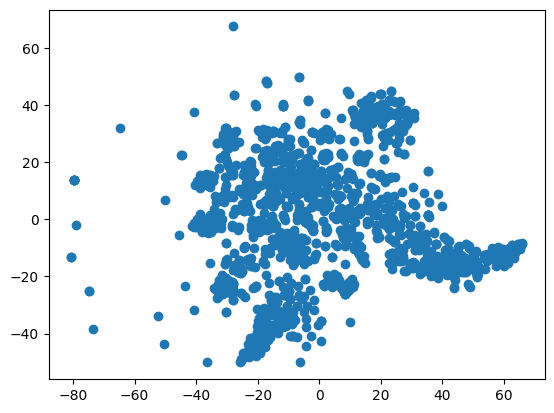

In [19]:
plt.scatter(tsne_model.embedding_[:, 0], tsne_model.embedding_[:, 1])

In [20]:
embeddings = tsne_model.embedding_

In [21]:
af = AffinityPropagation(preference=-50, random_state=0).fit(embeddings)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)



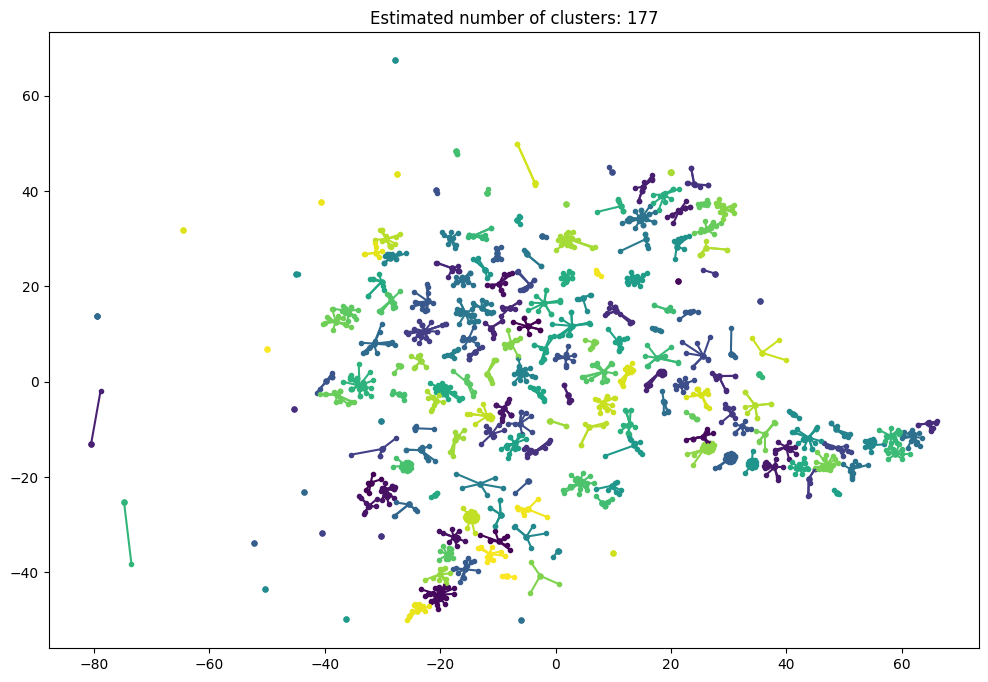

In [29]:
plt.close("all")
plt.figure(1, figsize=(12, 8))
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, n_clusters_)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = embeddings[cluster_centers_indices[k]]
    plt.scatter(
        embeddings[class_members, 0], embeddings[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in embeddings[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


In [23]:
labels # cluster labels

array([114, 108,  57, ..., 149, 129,  54])

In [24]:
tmp = []

for k in range(n_clusters_):
    class_members = (labels == k)
    cluster_center = embeddings[cluster_centers_indices[k]]
    cluster_center_name = data.index[cluster_centers_indices[k]]
    center_description = requirement_description.loc[cluster_center_name, 'requirement_description']
    center_doc = nlp(center_description)
    class_members_businesses = data.index[class_members]
    

    for name, xy in zip(class_members_businesses, embeddings[class_members]):
        description = requirement_description.loc[name, 'requirement_description']
        doc = nlp(description)
        similarity_score = center_doc.similarity(doc)
        x_center, y_center = cluster_center
        x, y = xy
        tmp.append([x_center, y_center, k, cluster_center_name, center_description, similarity_score])
        tmp.append([x, y, k, name, description, similarity_score])
        tmp.append([None, None, None])


/tmp/ipykernel_10829/575750655.py:15: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_score = center_doc.similarity(doc)


In [25]:
len(class_members_businesses)

5

In [26]:
outputdf = pd.DataFrame(tmp, columns=['x', 'y', 'cluster', 'business', 'requirement_description', 'similarity_score'])

In [27]:
outputdf.sample(20)

,x,y,cluster,business,requirement_description,similarity_score
4170,25.685925,-14.205144,146.0,STRATEGIC OPERATIONAL SOLUTIONS INC.,EO14042\nSERVICES IAW THE SOW (SECTION C); UPD...,0.843746
3412,9.776419,-24.575628,122.0,"PEREGRINE TECHNICAL SOLUTIONS, LLC",BBD PHASE 1C DEVELOPMENT FUNDING; EO14042\nINC...,0.600237
933,-11.077881,-10.994617,31.0,CONCURRENT TECHNOLOGIES CORP,MAST WELDMENT AND ASSEMBLIES,0.620276
3665,NaN,NaN,NaN,None,None,NaN
3965,NaN,NaN,NaN,None,None,NaN
2871,-19.067951,-1.844356,107.0,MENET AERO LLC,"P/N:SE601, DC GROUND FAULT INTERRUPTER",0.324417
1380,-15.732230,-39.376221,50.0,"EQUINIX, INC.",DCAAS SUPPORT SERVICES; MOD P00001 TO UPDATE I...,0.793395
4322,NaN,NaN,NaN,None,None,NaN
1596,-79.504288,13.814096,60.0,FIELDPRINT INC,FINGERPRINTING SUPPORT,0.649192
4395,-20.747597,-3.993565,154.0,"TELEDYNE INSTRUMENTS, INC.",EIGHT AUTONOMOUS UNDERWATER GLIDING VEHICLES; ...,0.823845


In [28]:
outputdf.to_csv("hayden-data.csv", index=False)